In [1]:
import pandas as pd
import numpy as np
from DDAL.ddal import DDAL as DDAL_alg

In [2]:
from torch import manual_seed
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader, random_split, IterableDataset, Dataset
from torchvision.transforms import Compose, ToTensor, Normalize, RandomRotation
from torchvision.datasets.mnist import MNIST 
from torchshow import show
from CNN_setup.model.CIFAR_CNN import CIFAR_CNN_Classifier
from CNN_setup.vars.CIFARvars import CIFAR10_classes

from CNN_setup.model.MNIST_CNN import Mnist_CNN_Classifier
from CNN_setup.vars.MNISTvars import MNIST_classes

from CNN_setup.utils.cnn_models_utils import load_model, evaluate
from torchvision.datasets import VisionDataset
import random

from PIL import Image

# Incremental, abrupt, and transformations

In [3]:
transform = Compose([ToTensor(), Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = CIFAR10(root='./data', train=False, download=False, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=32)

Files already downloaded and verified


In [5]:
class CustomCIFAR10(CIFAR10):
    def __init__(self, root, train=False, transform=None, target_transform=None, download=False, manual_seed=None):
        super().__init__(root, train=train, transform=transform, target_transform=target_transform, download=download)
        self.manual_seed = manual_seed

    def __getitem__(self, index):
        img, target = self.data[index], int(self.targets[index])
        img = Image.fromarray(img)
        
        if self.manual_seed is not None:
            manual_seed(self.manual_seed)

        if self.transform is not None:
            img = self.transform(img)   

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target
    
    
class CustomMNIST(MNIST):
    def __init__(self, root, train=False, transform=None, target_transform=None, download=False, manual_seed=None):
        super().__init__(root, train=train, transform=transform, target_transform=target_transform, download=download)
        self.manual_seed = manual_seed

    def __getitem__(self, index):
        img, target = self.data[index], int(self.targets[index])
        img = Image.fromarray(img.numpy(), mode="L")
        
        if self.manual_seed is not None:
            manual_seed(self.manual_seed)
            
        if self.transform is not None:
            img = self.transform(img)   
            
        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

In [25]:
transform_rotate = Compose([ToTensor(), RandomRotation (degrees = (90,90)),  Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [8]:
from torchshow import show

In [26]:
CustomCIFAR10_obj = CustomCIFAR10(root='./data', train=False, download=True, transform=transform_rotate, manual_seed=21)
CustomCIFAR10_obj_dataloader = DataLoader(CustomCIFAR10_obj, batch_size=32)

Files already downloaded and verified


3


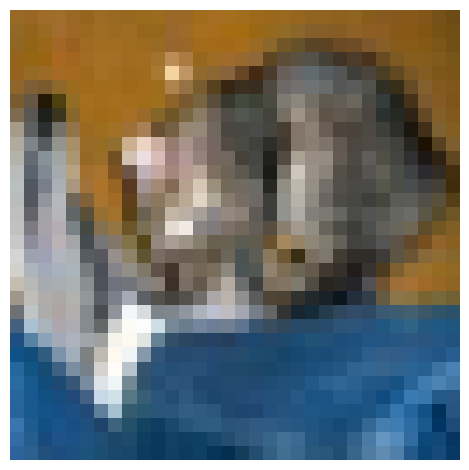

In [27]:
for img, l in test_dataset:
    print(l)
    show(img)
    break

3


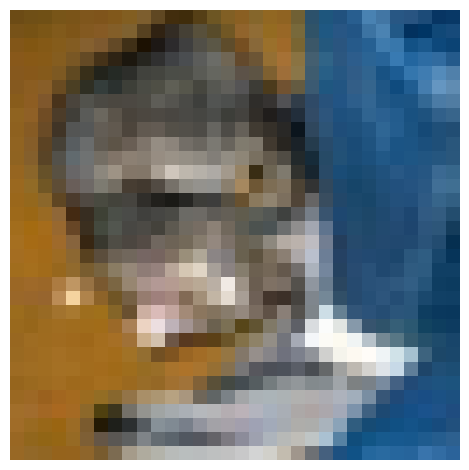

In [30]:
for img, l in CustomCIFAR10_obj:
    print(l)
    show(img)
    break

In [12]:
CIFAR_model = load_model("trained_models/CNN_cifar_downloaded.torch",CIFAR_CNN_Classifier())

In [13]:
evaluate(CustomCIFAR10_obj_dataloader,CIFAR_model,classes = CIFAR10_classes)

KeyboardInterrupt: 

### Check MNIST rotate

In [ ]:
transform_rotate = Compose([ToTensor(), RandomRotation(degrees=90), Normalize((0.5,), (0.5,))])

In [ ]:
CustomerMnist_obj = CustomMNIST(root='./data', train=True, download=True, transform=transform_rotate)
CustomerMnist_obj_dataloader = DataLoader(CustomerMnist_obj, batch_size=32)

MNIST_model = load_model("trained_models/CNN_mnist_downloaded.torch",Mnist_CNN_Classifier())

In [ ]:
evaluate(CustomerMnist_obj_dataloader,MNIST_model,classes = MNIST_classes)

Accuracy for class: 0 is 94.5 %
Accuracy for class: 1 is 96.9 %
Accuracy for class: 2 is 89.7 %
Accuracy for class: 3 is 85.2 %
Accuracy for class: 4 is 91.1 %
Accuracy for class: 5 is 90.6 %
Accuracy for class: 6 is 93.0 %
Accuracy for class: 7 is 90.5 %
Accuracy for class: 8 is 89.6 %
Accuracy for class: 9 is 86.9 %
Total Accuracy: 90.9 %


In [ ]:
evaluate(CustomerMnist_obj_dataloader,MNIST_model,classes = MNIST_classes)

Accuracy for class: 0 is 94.5 %
Accuracy for class: 1 is 96.9 %
Accuracy for class: 2 is 89.7 %
Accuracy for class: 3 is 85.2 %
Accuracy for class: 4 is 91.1 %
Accuracy for class: 5 is 90.6 %
Accuracy for class: 6 is 93.0 %
Accuracy for class: 7 is 90.5 %
Accuracy for class: 8 is 89.6 %
Accuracy for class: 9 is 86.9 %
Total Accuracy: 90.9 %


## Incremental

# DDAL

In [ ]:
t = DDAL_alg()

In [ ]:
def detect_drift(train_data: pd.DataFrame, test_data: pd.DataFrame, batch_size: int, target_column: str, training_split:int=5000):
    if test_data is None:
        df_y = train_data[target_column] 

        training_proportion = int(2 * len(train_data) / training_split)
        df_x_train = train_data[0:training_proportion].drop(columns=[target_column])
        df_y_train = df_y[0:training_proportion]

        data_test = train_data.iloc[training_proportion:len(train_data)].reset_index(drop=True)
    else:
        
        df_x_train = train_data.drop(columns=[target_column])
        df_y_train = train_data[target_column]

        data_test = test_data

    print(f"Size of train_data: {len(df_x_train)}, Size of test_data: {len(data_test)}")

    classifier = 

    batcher = BatchGenerator(batch_size=batch_size,df = data_test)

    ddal_detector = DDAL_alg(size_batch=batch_size, theta=0.005, lambida=0.95)

    batch_counter = 0
    total_batches = len(batcher)

    for batch_test in batcher:
        batch_test = batch_test.drop(columns=[target_column])
        for index, _ in batch_test.iterrows():
            y_pred = classifier.predict_proba(batch_test.iloc[[index]])
            ## y_out = np.concatenate((y_out, y_pred))
            max_y_pred_prob = y_pred.max()
            ddal_detector.count_selected_instances(max_y_pred_prob)

        batch_counter += 1
        if batch_counter % 10 == 0:
            batches_left = total_batches - batch_counter
            print(f"Processed {batch_counter} batches, {batches_left} batches left")

    ddal_detector.compute_current_density()

    if ddal_detector.detection_module():
        print('Drift Detected')
        ddal_detector.reset()

    return classifier


SyntaxError: invalid syntax (1554896809.py, line 19)

In [ ]:
clf = detect_drift(train_data = Mnist_data[0:100],test_data = None , batch_size= 50,target_column = 'label',training_split = 100)

Size of train_data: 2, Size of test_data: 98
Training finished: proceeding to detecting drift


In [ ]:
preds = clf.predict(Mnist_data.drop(columns=['label']))
f1_score(y_true= Mnist_data['label'],y_pred =preds,average = 'macro')
# 0.6456330681046007

0.030003301202160288

no drift detect with those settings
detect_drift(train_data = Mnist_data,test_data = None , batch_size= 50,target_column = 'label',training_split = 100)

In [ ]:
clf = detect_drift(train_data = Mnist_data,test_data = Mnist_data_rotated_df.iloc[0:1000] , batch_size= 50,target_column = 'label')

Size of train_data: 60000, Size of test_data: 1000


KeyboardInterrupt: 

In [ ]:
preds = clf.predict(Mnist_data_rotated_df.drop(columns=['label']))
f1_score(y_true= Mnist_data_rotated_df['label'],y_pred =preds,average = 'macro')

0.1432586166696402

In [ ]:
def data_generator(df):
    for _, row in df.iterrows():
        yield row.values

## Class holdback no transformation

In [ ]:
clf = detect_drift(train_data = Mnist_data.iloc[0:10000][Mnist_data['label']!= 9],test_data = None , batch_size= 50,target_column = 'label',training_split = 100)

C:\Users\wilkk\AppData\Local\Temp\ipykernel_7760\1341526207.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clf = detect_drift(train_data = Mnist_data.iloc[0:10000][Mnist_data['label']!= 9],test_data = None , batch_size= 50,target_column = 'label',training_split = 100)


Size of train_data: 180, Size of test_data: 8842
Training finished: proceeding to detecting drift
Processed 10 batches, 166 batches left
Processed 20 batches, 156 batches left


KeyboardInterrupt: 

In [ ]:
preds = clf.predict(Mnist_data.drop(columns=['label']))
f1_score(y_true= Mnist_data['label'],y_pred = preds,average = 'macro')
# 0.41341645131153193

0.41341645131153193

# Incremental-ks

In [ ]:
from random import random
from collections import deque

In [ ]:
from incremental_ks.IncrementalKS.main import IKS, IKSSW

In [ ]:
def detect_drift_iks(df_train, df_test):

  iks_statistics = [] # collect statistics generated by IKS
  iks = IKS() # group 0 = reference; group 1 = sliding

  sliding = deque()

  for _, row in df_train.iterrows():
    iks.Add((row, random()), 0)
    wrnd = (row, random()) # we only need to keep RND component for values in the sliding window
    iks.Add(wrnd, 1)
    sliding.append(wrnd)

  # process sliding window
  for _, row in df_test.iterrows():
    iks.Remove(sliding.popleft(), 1)
    wrnd = (row, random())
    iks.Add(wrnd, 1)
    sliding.append(wrnd)

    iks_statistics.append(iks.KS())
  
  return iks_statistics


sliding window = 1 image

In [ ]:
mnist_reference = Mnist_data.drop(columns=['label']).copy()

In [ ]:
iks_statistics = [] # collect statistics generated by IKS
iks = IKSSW(mnist_reference.iloc[0]) # group 0 = reference; group 1 = sliding and # add first image as the first reference

for i, row in Mnist_data[1:].drop(columns=['label']).iterrows():
  if iks.Test(): 
    iks.Update()
    print("Drift detected")

  # process sliding window
  for val in row:
    iks.Increment(val)

    iks_statistics.append(iks.KS())
    break_loops = True


Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected
Drift detected


KeyboardInterrupt: 

In [ ]:
iks_statistics = [] # collect statistics generated by IKS
iks = IKSSW(mnist_reference.iloc[0]) # group 0 = reference; group 1 = sliding and # add first image as the first reference

for i, row in Mnist_data[1:].drop(columns=['label']).iterrows():
  if iks.Test():
    print(f"Drift detected at i: {i}") 
    break

  # process sliding window
  for val in row:
    iks.Increment(val)
    iks_statistics.append(iks.KS())


Drift detected at i: 9


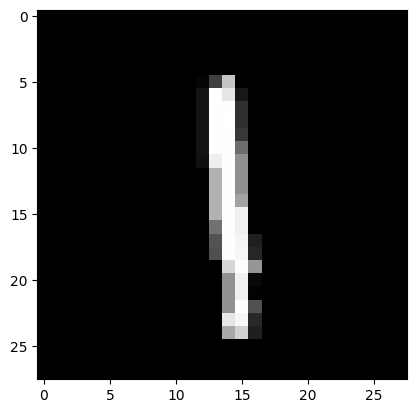

In [ ]:
image_show(mnist_reference,(28,28),i-1)

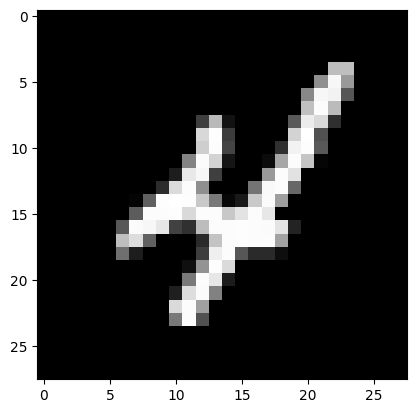

In [ ]:
image_show(mnist_reference,(28,28),i)

In [ ]:
iks_statistics = [] # collect statistics generated by IKS
iks = IKSSW(mnist_reference.iloc[0]) # group 0 = reference; group 1 = sliding and # add first image as the first reference

for i, row in Mnist_data[1:].drop(columns=['label']).iterrows():
  if iks.Test(): 
    iks.Update()
    print("Drift detected")

  # process sliding window
  for val in row:
    iks.Increment(val)

    iks_statistics.append(iks.KS())

In [ ]:
detect_drift_iks(Mnist_data.drop(columns=['label']),Mnist_data_rotated_df.drop(columns=['label']))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
from time import time
from itertools import chain
from random import random

from collections import deque

initial = np.random.normal(loc = 0, scale = 1, size = 500)

stream = list(chain(*[np.random.normal(loc = 1.0 * (i % 2), scale = 1, size = 500) for i in range(10)]))

######################
## TEST IKS
######################

start = time()

iks_statistics = [] # collect statistics generated by IKS
iks = IKS() # group 0 = reference; group 1 = sliding

sliding = deque()

for val in initial:
  iks.Add((val, random()), 0)
  wrnd = (val, random()) # we only need to keep RND component for values in the sliding window
  iks.Add(wrnd, 1)
  sliding.append(wrnd)

# process sliding window
for val in stream:
  iks.Remove(sliding.popleft(), 1)
  wrnd = (val, random())
  iks.Add(wrnd, 1)
  sliding.append(wrnd)

  iks_statistics.append(iks.KS())

finish = time()
print(f'Elapsed time for IKS to process stream: {round(finish - start, 2)} sec')

Elapsed time for IKS to process stream: 1.3 sec
